In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def lineal(x, a, b):
    return a*x + b
def coef_determinacion(observaciones, predicciones):
    residuo = observaciones - predicciones
    ss_res = np.sum(residuo**2)
    ss_tot = np.sum((observaciones - np.mean(observaciones))**2)
    r_cuadrado = 1 - (ss_res/ss_tot)
    return r_cuadrado
def regresion(modelo, x, y):
    # No puede haber nungún NaN
    ajuste, covarianzas = curve_fit(modelo, x, y)
    predicciones = modelo(x, *ajuste)
    errores = np.sqrt(np.diag(covarianzas))
    r_cuadrado = coef_determinacion(y, predicciones)
    return predicciones, ajuste, errores, r_cuadrado

def metadata(titulo, ejex, ejey):
    plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))
def grafico_modelo(x, y, predicciones, ajuste, errores, r_cuad):
    plt.plot(x, y, 'bo')
    plt.plot(x, predicciones, 'r-',
             label = (' a = ' + cifras_signif(ajuste[0], 2)
                      + ' std_a = ' + cifras_signif(errores[0], 2) + '\n'
                      + ' b = ' + cifras_signif(ajuste[1], 2)
                      + ' std_b = ' + cifras_signif(errores[1], 2) + '\n'
                      + ' R^2 = ' + cifras_signif(r_cuad, 2)
                     )
             )
    plt.legend(fontsize = 20)
    return

def regresion_y_grafico(modelo, x, y, titulo, xlabel, ylabel):
    predicciones, ajuste, errores, r_cuadrado = regresion(modelo, x, y)
    scatter = plt.figure(figsize = (18, 9))
    metadata(titulo, xlabel, ylabel)
    grafico_modelo(x, y, predicciones, ajuste, errores, r_cuadrado)
    return predicciones, ajuste, errores, r_cuadrado, scatter

def mae(x, y):
    n = x.count()
    diff = abs(y - x)
    mae = diff.sum() * (1/n)
    return mae
def mse(x, y):
    n = x.count()
    diff = (y - x)**2
    mse = diff.sum() * (1/n)
    return mse
def rmse(x, y):
    rmse = (mse(x, y))**(1/2)
    return rmse
def indice_acuerdo(x, y):
    diff = (y - x)**2
    long = (abs(x) + abs(y))**2
    d = 1 - diff.sum()/long.sum()
    return d
def metricas(x, y):
    mae_f = str(mae(x, y))
    mse_f = str(mse(x, y))
    rmse_f = str(rmse(x, y))
    indice_f = str(indice_acuerdo(x, y))
    return print('MAE ' + mae_f + '\n'
                'MSE ' + mse_f + '\n'
                'RMSE ' + rmse_f + '\n'
                'Indice de acuerdo ' + indice_f + '\n')

In [4]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Ej_8.txt',
    delimiter = '\t',
    decimal = ',',
    )

In [5]:
datos.head()

,N,FECHA Y HORA,FECHA,HORA,TA [C],TF_S [C],TF_O [C]
0,1,18/2 9:00,18/2,09:00,20.45,21.01,20.18
1,2,18/2 10:00,18/2,10:00,22.78,24.14,23.53
2,3,18/2 11:00,18/2,11:00,24.13,26.69,25.67
3,4,18/2 12:00,18/2,12:00,25.49,29.06,27.60
4,5,18/2 13:00,18/2,13:00,26.57,30.14,29.01


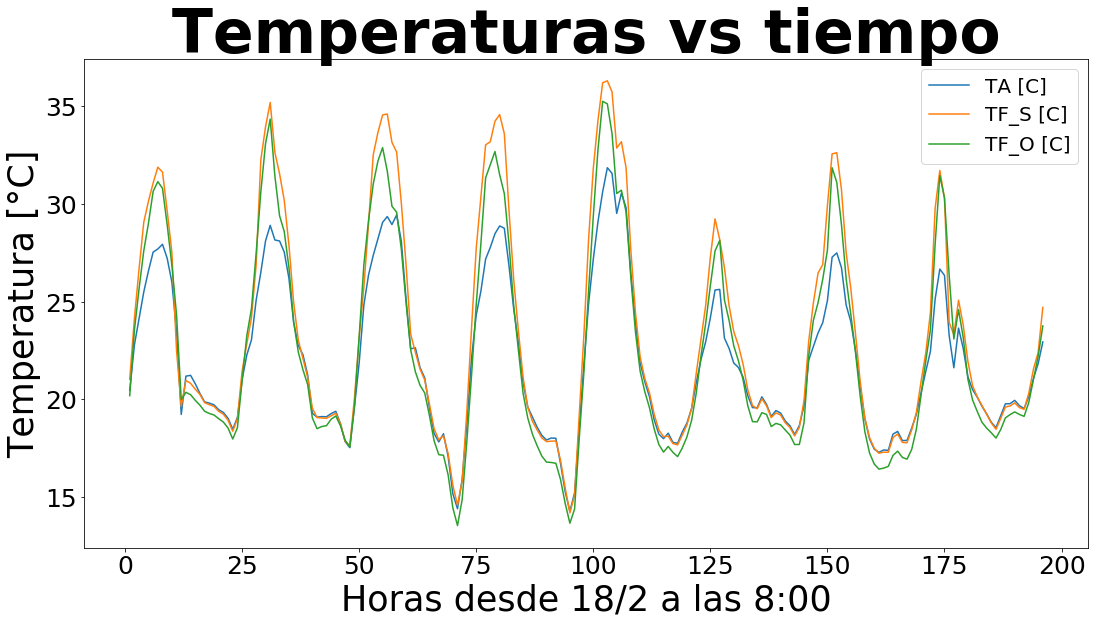

In [15]:
graficos = plt.figure(figsize = (18, 9))
metadata('Temperaturas vs tiempo', 'Horas desde 18/2 a las 8:00', 'Temperatura [°C]')
columnas = datos.columns[4:]
for i in columnas:
    plt.plot(
        datos['N'],
        datos[i],
        '-'
        )
plt.legend(columnas, fontsize = 20)

In [16]:
graficos.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Temp_vs_tiempo')

In [8]:
muestra = datos[['TA [C]', 'TF_O [C]']].sample(frac = 2/3, random_state = 1).sort_index()
validacion = datos[['TA [C]', 'TF_O [C]']].drop(muestra.index)

In [9]:
validacion.head(10)

,TA [C],TF_O [C]
1,22.78,23.53
3,25.49,27.60
7,27.93,30.79
8,27.21,28.92
9,25.99,26.86
15,20.29,19.69
20,19.32,18.83
22,18.46,17.96
23,19.07,18.54
24,21.00,20.96


In [10]:
muestra.head(10)

,TA [C],TF_O [C]
0,20.45,20.18
2,24.13,25.67
4,26.57,29.01
5,27.53,30.64
6,27.69,31.14
10,23.44,24.32
11,19.22,19.98
12,21.18,20.35
13,21.22,20.23
14,20.79,19.94


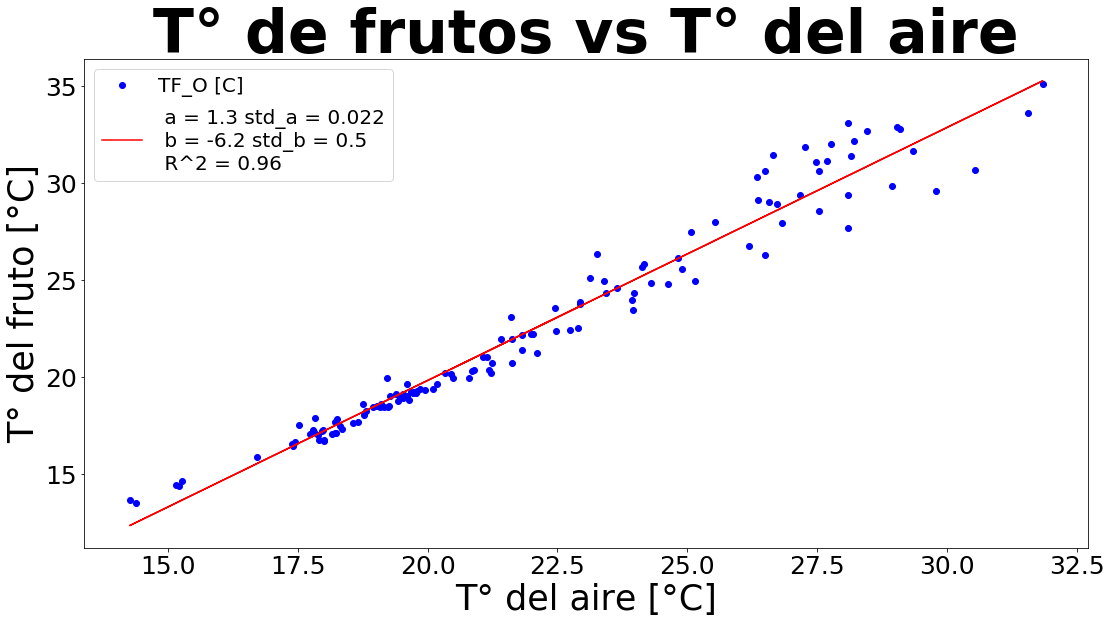

In [11]:
predicciones_mu, ajuste_mu, errores_mu, r_cuadrado_mu, graf_mu = regresion_y_grafico(
    lineal, muestra['TA [C]'], muestra['TF_O [C]'],
    'T° de frutos vs T° del aire', 'T° del aire [°C]', 'T° del fruto [°C]'
    )

In [12]:
graf_mu.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Prono_vs_obs_60')

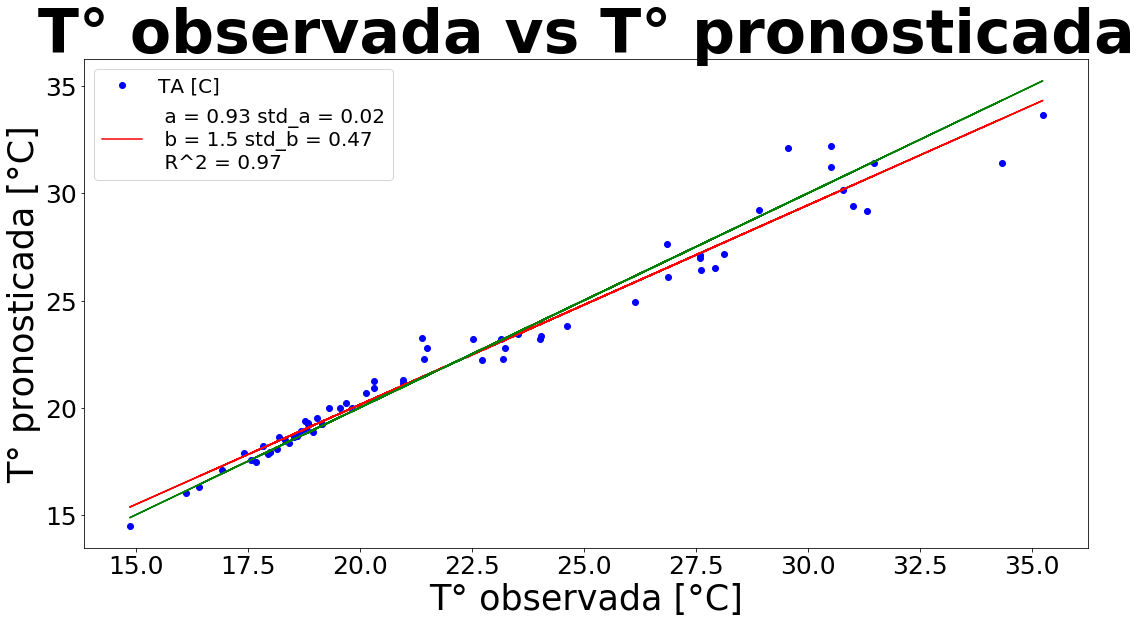

In [13]:
pronostico = validacion['TA [C]']*ajuste_mu[0] + ajuste_mu[1]
predicciones_val, ajuste_val, errores_val, r_cuadrado_val, graf_val = regresion_y_grafico(
    lineal, validacion['TF_O [C]'], pronostico,
    'T° observada vs T° pronosticada', 'T° observada [°C]', 'T° pronosticada [°C]'
    )
plt.plot(validacion['TF_O [C]'], validacion['TF_O [C]'], 'g-')

In [14]:
graf_val.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Prono_vs_obs')

In [16]:
metricas(pronostico, validacion['TF_O [C]'])

MAE 0.6245670110614321
MSE 0.7712987541012526
RMSE 0.8782361607798056
Indice de acuerdo 0.9996333761098389



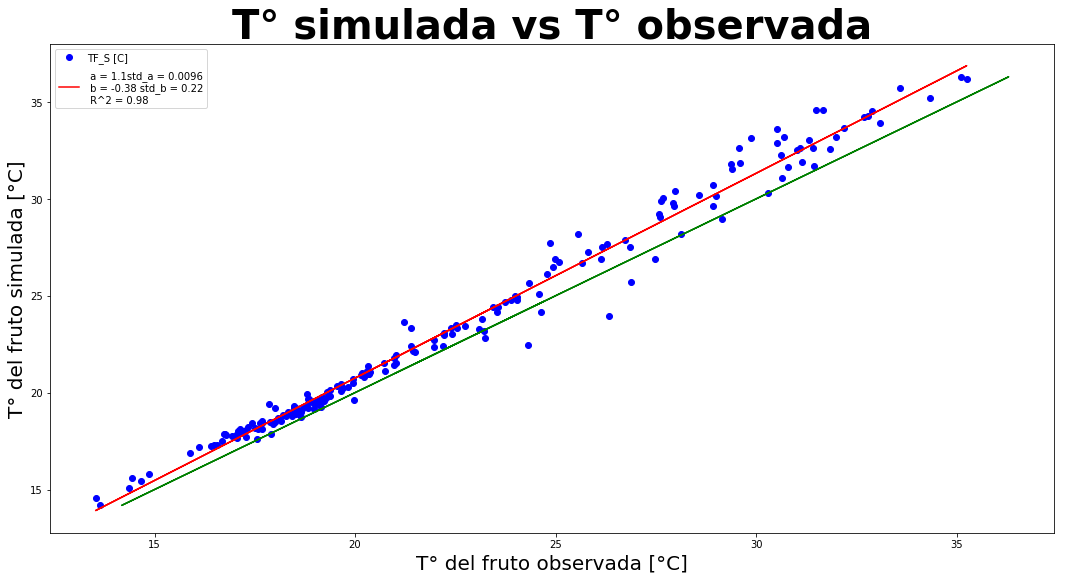

In [28]:
predicciones_mec, ajuste_mec, errores_mec, r_cuadrado_mec, graf_mec = regresion_y_grafico(
    lineal, datos['TF_O [C]'], datos['TF_S [C]'], 
    'T° simulada vs T° observada', 'T° del fruto observada [°C]', 'T° del fruto simulada [°C]'
    )
plt.plot(datos['TF_S [C]'], datos['TF_S [C]'], 'g-')

In [29]:
graf_mec.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Prono_vs_obs_mec')

In [23]:
metricas(datos['TF_S [C]'], datos['TF_O [C]'])

MAE 0.9660204081632651
MSE 1.365478571428571
RMSE 1.1685369362705533
Indice de acuerdo 0.9993822557920956



In [26]:
datos.columns[4:]

Index(['TA [C]', 'TF_S [C]', 'TF_O [C]'], dtype='object')